In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# read dataset
with open('../data/Zip_Zhvi_SingleFamilyResidence.csv', 'rb') as f:
    df = pd.read_csv(f).fillna(0)

# convert non-timeseries
df[['City', 'State', 'Metro', 'CountyName']] = df[['City', 'State', 'Metro', 'CountyName']].astype(str)
df[['RegionID', 'RegionName', 'SizeRank']] = df[['RegionID', 'RegionName', 'SizeRank']].astype(int)

# convert to lowercase
df[['City', 'State', 'Metro', 'CountyName']] = df[['City', 'State', 'Metro', 'CountyName']].apply(
  lambda x: x.astype(str).str.lower()
)

# timeseries data
start_index = df.columns.get_loc('1996-04') + 1
date_columns = df.iloc[:,start_index:len(df.columns)].columns.tolist()

# ensure integer timeseries
df[date_columns] = df[date_columns].astype(int)

In [92]:
# metro areas
hot_springs = df.loc[(df['Metro'] == 'hot springs') & (df['State'] == 'ar')]
little_rock = df.loc[(df['Metro'] == 'little rock') & (df['State'] == 'ar')]
fayetteville = df.loc[(df['Metro'] == 'fayetteville') & (df['State'] == 'ar')]
searcy = df.loc[(df['Metro'] == 'searcy') & (df['State'] == 'ar')]

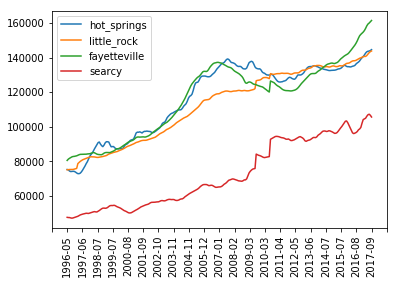

In [149]:
# timeseries plot
fig, ax = plt.subplots()
ax.plot(hot_springs[date_columns].mean(), linestyle='solid')
ax.plot(little_rock[date_columns].mean(), linestyle='solid')
ax.plot(fayetteville[date_columns].mean(), linestyle='solid')
ax.plot(searcy[date_columns].mean(), linestyle='solid')

# decrease ticks
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 23), 2))

# rotate ticks + show legend
plt.xticks(rotation=90)
plt.gca().legend(('hot_springs', 'little_rock', 'fayetteville', 'searcy'))

# show overall plot
plt.show()